_Run Cell 1 without change_ (Included in all my notebooks because I use jupyter lab templates.)

In [1]:
import sys
import time
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
import numpy as np
import pandas as pd
from pathlib import Path

# To get multiple outputs into 1 cell w/o using print:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# autoreload extension
from IPython import get_ipython
ipython = get_ipython()
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# -----------------------------------------
# USEFUL FUNCTIONS:

def add_to_sys_path(this_path, up=False):
    """
    To be used if the current project is not (yet)  packaged.
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    if up:
        newp = Path(this_path).parent
    else:
        newp = Path(this_path)
    src = newp.joinpath("src")
    if src.exists():
        newp = str(src)
    else:
        newp = str(newp)
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path: {}'.format(newp))


# Filtered dir() for method discovery:
def fdir(obj, start_with_str='_', exclude=True):
    return [d for d in dir(obj) if not d.startswith(start_with_str) == exclude]


def show_elapsed_time(start_t:time):
    elapsed = time.time() - start_t
    print(f"Elapsed time: {elapsed:,.2f} s ({elapsed/60:,.2f} min).")
    return

In [4]:
# Insert current src dir into sys.path so that modules in ../src can be imported:
# CHANGE THIS IF NEEDED (up=True if this notebook is inside a folder):

add_to_sys_path(Path.cwd(), up=True)

Error importing ms_analysis as msa:
No module named 'ms_analysis'



In [5]:
from collections import defaultdict
from crgms import ms_crg_analysis as crgmsa
import os

---
# Charge microstate processing to produce vectors of charge microstates in a csv

In [6]:
nbks_dir = Path.cwd()

# May want to change this:
mcce_dir = nbks_dir.joinpath("data/4lzt")

## Path validation function included in the 2 main processes of the cli

In [26]:
ph_pt = 7
h3_fp, msout_fp = crgmsa.check_mcce_input_files(mcce_dir, ph_pt)
h3_fp
msout_fp

print(f"Default residues of interest: {crgmsa.IONIZABLES = }")

PosixPath('/home/cat/projects/MCCE_crgms/notebooks/data/4lzt/head3.lst')

PosixPath('/home/cat/projects/MCCE_crgms/notebooks/data/4lzt/ms_out/pH7eH0ms.txt')

Default residues of interest: crgmsa.IONIZABLES = ['ASP', 'GLU', 'ARG', 'HIS', 'LYS', 'CYS', 'TYR', 'NTR', 'CTR']


# Getting the topN charge microstates:
## Corresponding cli cmds:
### if called within a mcce dir & ph_pt == 7:  `>mc_crg_analysis.py -top_n 4`
### if referencing a mcce dir & ph_pt == 7:  `>mc_crg_analysis.py -run_dir /some/path/4lzt -top_n 4`

In [10]:
top4 = crgmsa.get_topN_crg_microstates(mcce_dir, top_n=4, return_df=True)
top4

Order,1,2,3,4
Residue,,,,
NTRA0001_,0.00,0.000,1.000,0.000
LYSA0001_,1.00,1.000,1.000,1.000
LYSA0013_,1.00,1.000,1.000,1.000
HISA0015_,0.00,1.000,0.000,0.000
TYRA0020_,0.00,0.000,0.000,0.000
LYSA0033_,1.00,1.000,1.000,1.000
GLUA0035_,-1.00,-1.000,-1.000,-1.000
ASPA0048_,-1.00,-1.000,-1.000,-1.000
ASPA0052_,-1.00,-1.000,-1.000,-1.000


In [25]:
# test: res_of_interest = []

top4 = crgmsa.get_topN_crg_microstates(mcce_dir, top_n=4, return_df=True, res_of_interest=[])
top4.shape
top4

(47, 4)

Order,1,2,3,4
Residue,,,,
NTRA0001_,0.00,0.000,1.000,0.000
LYSA0001_,1.00,1.000,1.000,1.000
LYSA0013_,1.00,1.000,1.000,1.000
HISA0015_,0.00,1.000,0.000,0.000
TYRA0020_,0.00,0.000,0.000,0.000
SERA0024_,0.00,0.000,0.000,0.000
ASNA0027_,0.00,0.000,0.000,0.000
LYSA0033_,1.00,1.000,1.000,1.000
GLUA0035_,-1.00,-1.000,-1.000,-1.000


# Getting the charge microstates with weighted correlation:
## Corresponding cli cmds:
### if called within a mcce dir & ph_pt == 7:  `>mc_crg_analysis.py -res_of_interest ASP GLU BCL`
### if referencing a mcce dir & ph_pt == 7:  `>mc_crg_analysis.py -run_dir /some/path/ps2 -res_of_interest ASP GLU BCL`

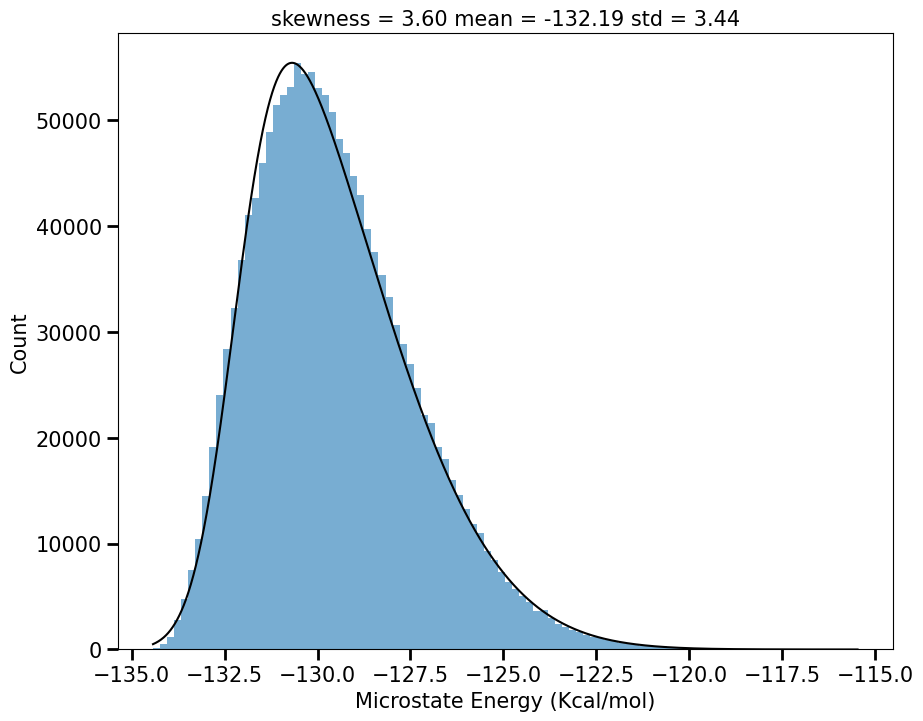

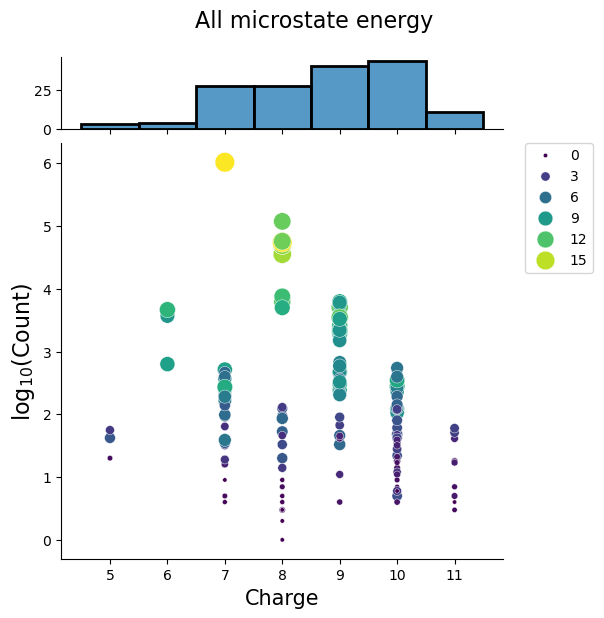

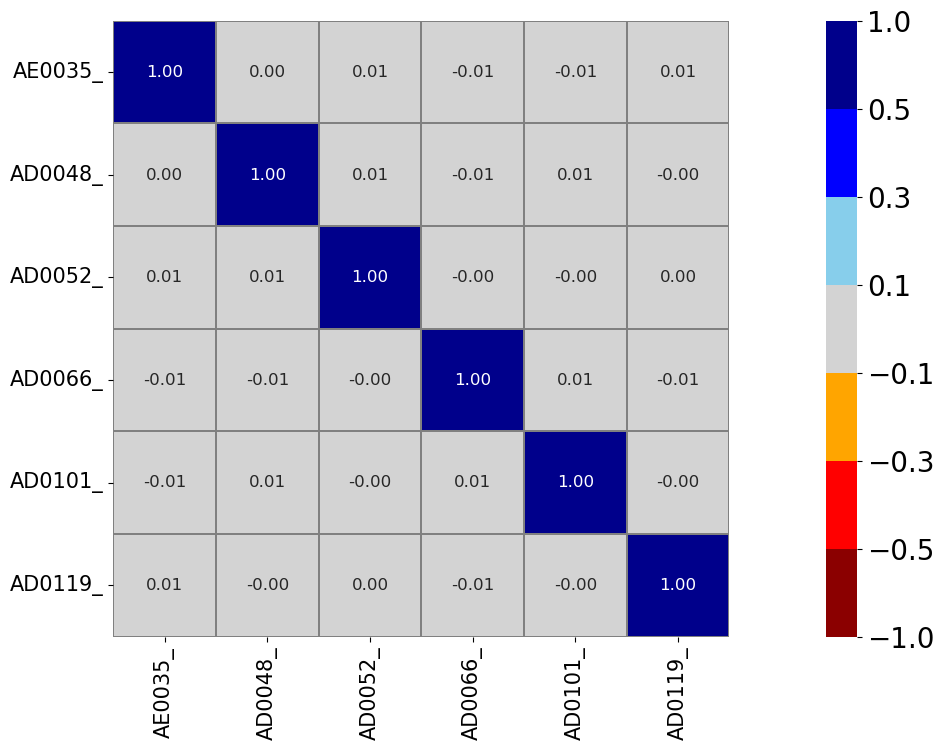

In [20]:
rois = ["ASP","GLU","BCL"]
crgmsa.crg_msa_with_correlation(mcce_dir, res_of_interest=rois)

# test cli programmatically

## Example for getting topN crgms:

In [13]:
n = 2
args = f"-run_dir {mcce_dir} -top_n {n}"
crgmsa.crgmsa_cli(args.split())

## Example passing a list of residues:

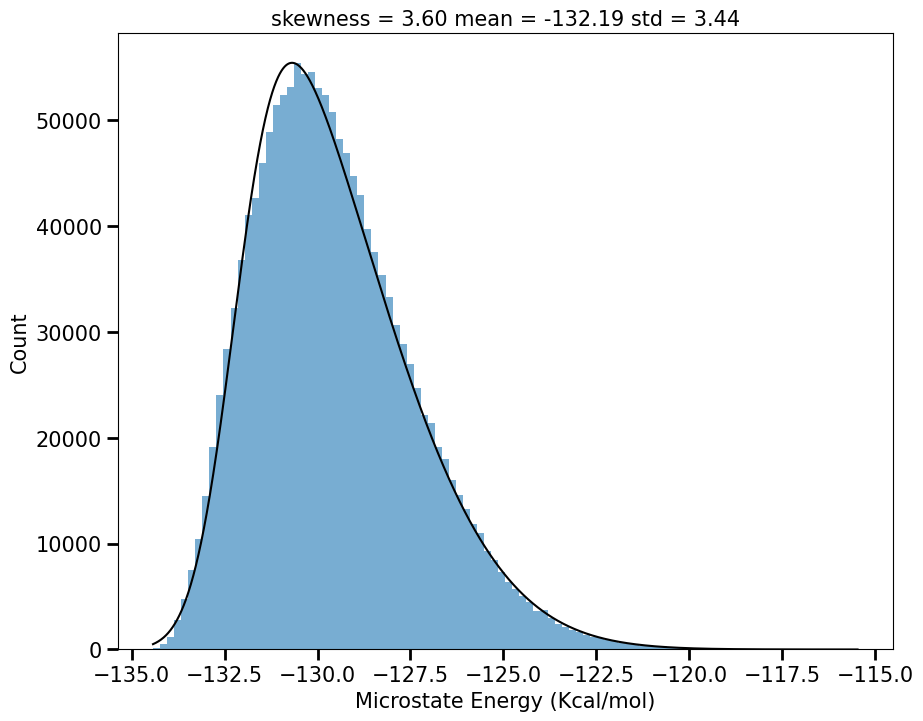

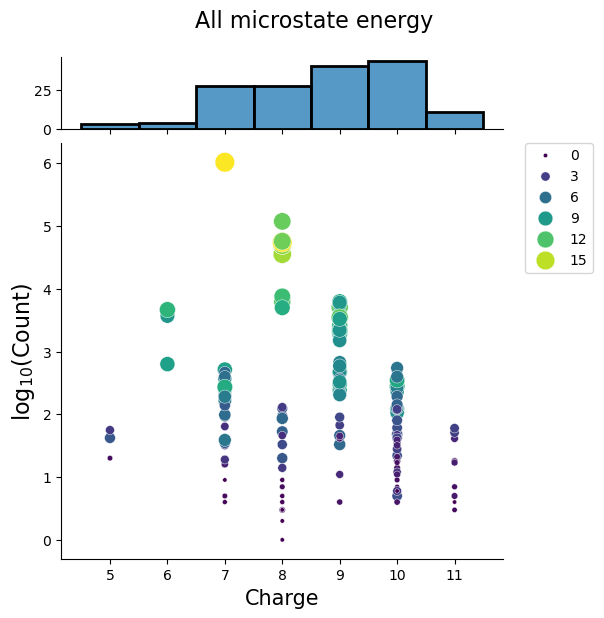

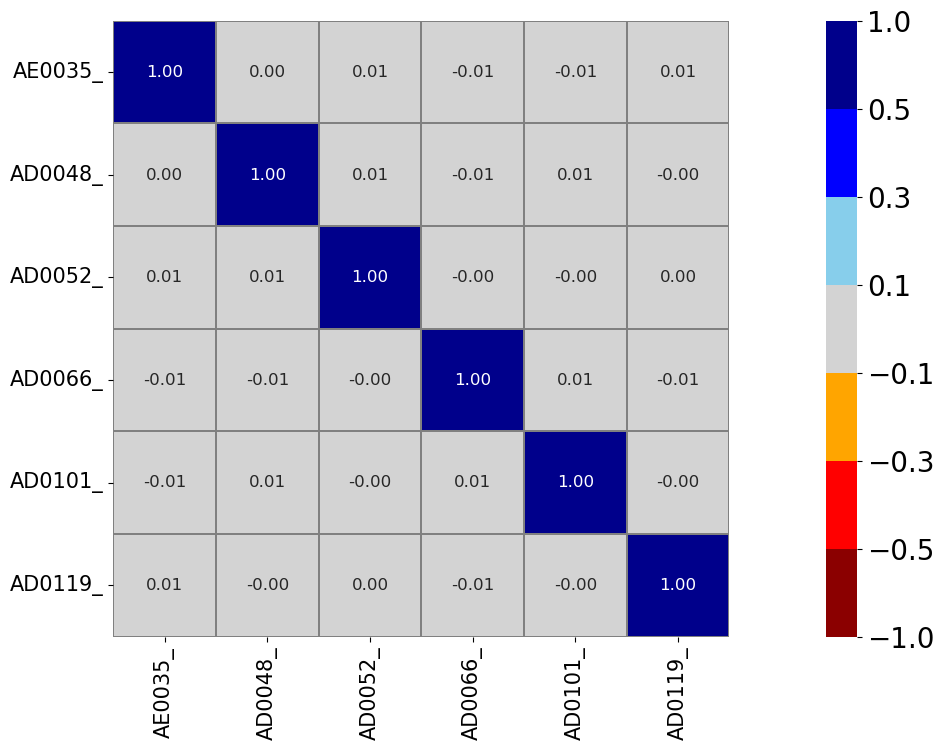

In [18]:
args = f"-run_dir {mcce_dir} -res_of_interest ASP GLU"
crgmsa.crgmsa_cli(args.split())

## see err msg? using default run_dir == current dir == notebooks/

In [19]:
args = f"-top_n {n}"
crgmsa.crgmsa_cli(args.split())

SystemExit: FileNotFoundError: head3.lst not found in /home/cat/projects/MCCE_crgms/notebooks.

/home/cat/miniconda3/envs/mce/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
